<a href="https://colab.research.google.com/github/siddhanttripathi13/data_analysis/blob/main/Google%20Play%20Store/Play_Store_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis of Play Store apps

## Data download

In [3]:
pip install opendatasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/lava18/google-play-store-apps'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: siddhanttripathi13
Your Kaggle Key: ··········


100%|██████████| 1.94M/1.94M [00:00<00:00, 57.3MB/s]

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('./google-play-store-apps/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df.columns = df.columns.str.replace(' ', '_') #replacing spaces in column names with underscore to access them as datafram attributes
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Current_Ver     10833 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Data wrangling

In [9]:
df.isnull().sum() #number of null values per column

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

In [10]:
#data contains a row where the values are shifted right by one column
df[df.App== 'Life Made WI-Fi Touchscreen Photo Frame']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
mask = ~(df.columns.isin(['App'])) #all columns except 'App'
cols_to_shift = df.columns[mask]

df.loc[df.Last_Updated == '1.0.19', cols_to_shift] = df.loc[df.Last_Updated == '1.0.19',mask].shift(1, axis=1) #shiftih all columns except 'App'

df[df.App== 'Life Made WI-Fi Touchscreen Photo Frame']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [12]:
df.Last_Updated = pd.to_datetime(df.Last_Updated) #type casting as datetime object

In [13]:
df[df.Type == "Paid"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,17,157k,100+,Paid,$0.99,Mature 17+,Entertainment,2015-11-25,1.2,2.1 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,"1,000+",Paid,$7.99,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11M,"10,000+",Paid,$16.99,Teen,Action,2015-02-27,2.22,5.0 and up
10785,"sugar, sugar",FAMILY,4.2,1405,9.5M,"10,000+",Paid,$1.20,Everyone,Puzzle,2018-06-05,2.7,2.3 and up


In [14]:
df.Price = pd.to_numeric(df.Price.str.replace('$','')) #typecasting price column as number
df[df.Type == "Paid"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,17,157k,100+,Paid,0.99,Mature 17+,Entertainment,2015-11-25,1.2,2.1 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,"1,000+",Paid,7.99,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11M,"10,000+",Paid,16.99,Teen,Action,2015-02-27,2.22,5.0 and up
10785,"sugar, sugar",FAMILY,4.2,1405,9.5M,"10,000+",Paid,1.20,Everyone,Puzzle,2018-06-05,2.7,2.3 and up


In [15]:
df.Installs = df.Installs.str.replace(',','') #typecasting installs column  as number after replacing ',' and '+'
df.Installs = pd.to_numeric(df.Installs.str.replace('+',''))
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [16]:
df.Size

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10841, dtype: object

In [17]:
def format_size(strg):
  if strg[0].isdigit():
    if strg.lower().endswith('m'):
      return float(strg[:-1])
    elif strg.lower().endswith('k'):
      return float(strg[:-1])/1024
  else:
    return np.nan

In [18]:
df.Size = df.Size.apply(format_size) #removing trailing 'M' or 'K' from app size

In [19]:
df.Size = pd.to_numeric(df.Size)#typecasting as numbers
df.Reviews = pd.to_numeric(df.Reviews)

In [20]:
df.Rating = pd.to_numeric(df.Rating)

In [21]:
df.Size.describe()

count    9146.000000
mean       21.514141
std        22.588679
min         0.008301
25%         4.900000
50%        13.000000
75%        30.000000
max       100.000000
Name: Size, dtype: float64

In [22]:
df.Rating = pd.to_numeric(df.Rating)

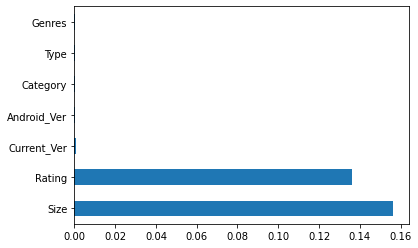

In [23]:
missing_percent = df.isnull().sum().sort_values(ascending=False)/df.shape[0] # percentage of missing values in each column
missing_percent = missing_percent[missing_percent!=0] #excluding columns which do not have missing values
missing_percent.plot(kind='barh')
plt.show()# most of the missing values in size column are becasue the app size varies wtih device 

## Data analysis

### Questions on the data
  - Number of paid vs free apps
  - Number of apps per category
  - What is the most expensive app on the store ?
  - What is the average size of the free apps & paid apps ?
  - What are the 5 top expensive apps that has rate of 5 ?
  - How many apps have more than 50K reviews ?
  - How many apps have a rating > 4.7 and what is their avg price ?
  - What is the max and min size for free and paid apps ?
  - Is there a correlation between rating, Reviews, and Size with the price of the app ?
  - How many apps for each type for each content reading ?
  - How many apps can work on android version 4 ?
  - Oldest and newest updated app
  - Correlation of last updated with ratings and reviews

0.926113827137718

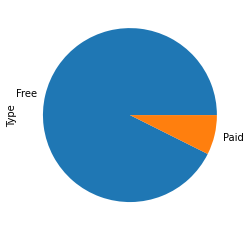

In [24]:
df.Type.value_counts().plot(kind='pie')

percent_free_apps = len(df[df.Type=='Free'])/len(df)

percent_free_apps

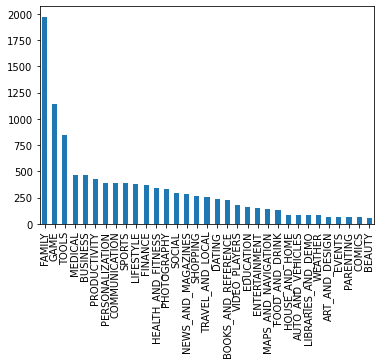

In [25]:
df.Category.value_counts().plot(kind='bar') #number of apps per category

In [26]:
most_expensive_app = df[df.Price == df.Price.max()]
most_expensive_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,10000,Paid,400.0,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up


In [27]:
df.groupby('Type')['Size'].describe() #size characteristics of free and paid apps

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,8422.0,21.703918,22.617502,0.008301,5.0,13.00,30.0,100.0
Paid,724.0,19.306538,22.146741,0.013672,2.9,9.55,28.0,100.0


In [28]:
df[df.Rating==5][['App','Price']].sort_values(by='Price',ascending=False).head() #top 5 most expensive apps with a rating of 5

,App,Price
5489,AP Art History Flashcards,29.99
7477,USMLE Step 2 CK Flashcards,19.99
5246,Hey AJ! It's Bedtime!,4.99
7204,TI-84 CE Graphing Calculator Manual TI 84,4.99
5482,meStudying: AP English Lit,4.99


In [29]:
df[df.Reviews>50000]['App'].count() #apps with more than 50k reviews

2782

In [30]:
df[df.Rating>4.7]['App'].count() #apps with more than 4.7 rating

595

In [31]:
df[df.Rating>4.7]['Price'].mean() #average price of 4.7 or higher rated apps

0.5018487394957983

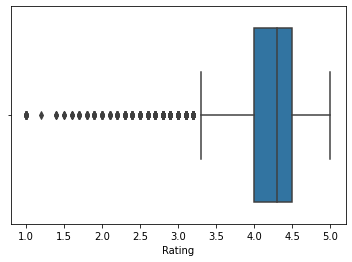

In [32]:
sns.boxplot(x='Rating',data = df) #distribution og ratings in the dataset

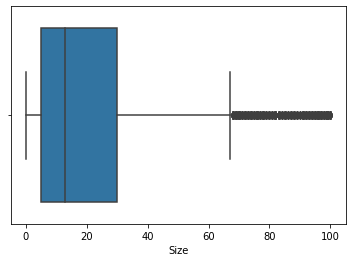

In [33]:
sns.boxplot(x='Size',data = df) #distribution of apps size in the dataset

In [34]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [35]:
def four_and_up(version):

  try:
    if version.startswith('4'):
      return True
    else:
      return False
  except:
    return False


df['4_and_up'] = df.Android_Ver.apply(four_and_up) #add a column to check if compatible with android version 4 and up
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,4_and_up
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,True
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,True
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,True
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,True
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,True


In [36]:
df[df['4_and_up']]['App'].count() #number of apps compatiblw with android version 4 and up

6960

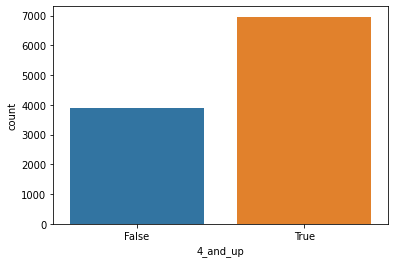

In [37]:
sns.countplot(x='4_and_up',data=df)

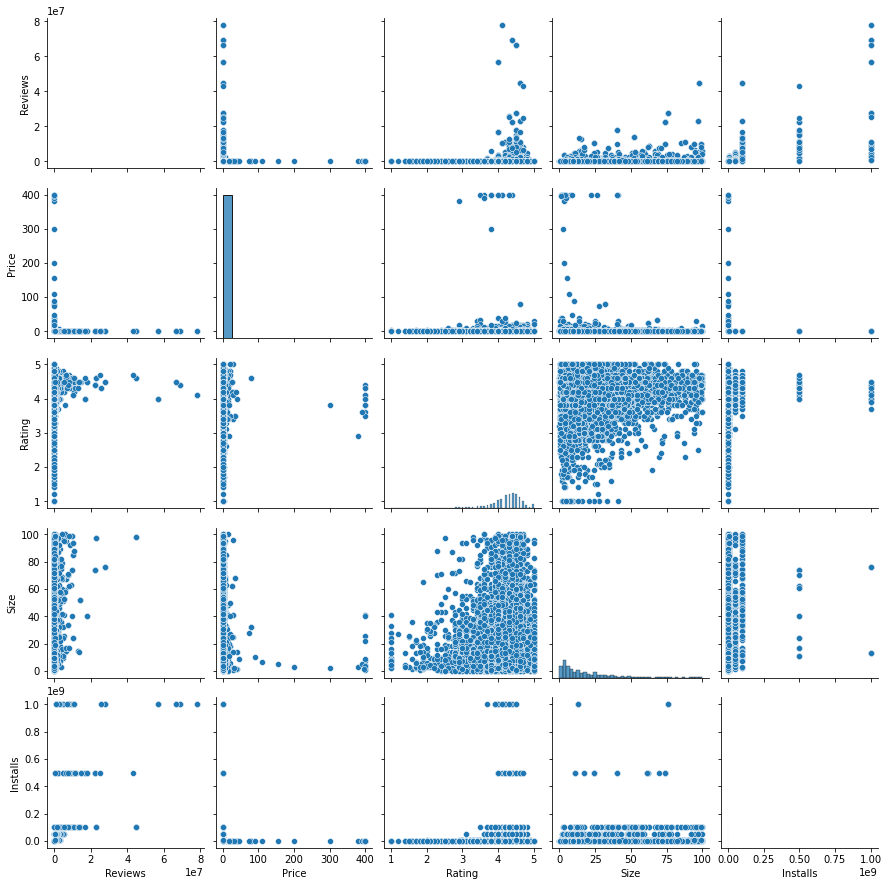

In [38]:
pairplot_df = df.loc[:,['Reviews','Price','Rating','Size','Installs']]
sns.pairplot(pairplot_df)

In [39]:
df.groupby(['Type','Content_Rating'])['App'].count() #number of apps of each type and each content rating

Type  Content_Rating 
Free  Adults only 18+       3
      Everyone           8020
      Everyone 10+        380
      Mature 17+          479
      Teen               1156
      Unrated               2
Paid  Everyone            695
      Everyone 10+         33
      Mature 17+           20
      Teen                 52
Name: App, dtype: int64

In [40]:
df[df.Last_Updated == df.Last_Updated.max()][['App','Last_Updated']] #newest updated apps

,App,Last_Updated
10209,Video Downloader For FB: Save FB Videos 2018,2018-08-08
10408,Shoot Hunter-Gun Killer,2018-08-08
10712,Lalafo Pulsuz Elanlar,2018-08-08
10718,BankNordik,2018-08-08
10760,Fast Tract Diet,2018-08-08


In [41]:
df[df.Last_Updated == df.Last_Updated.min()][['App','Last_Updated']] #oldest updated app

,App,Last_Updated
7479,FML F*ck my life + widget,2010-05-21


In [42]:
corr_df = df.loc[:,['Last_Updated','Rating','Reviews']]
corr_df.Last_Updated = pd.to_numeric(corr_df.Last_Updated)

corr_df.corr()['Last_Updated'][1:] #correlation between last updated with rating and reviews

Rating     0.142552
Reviews    0.085284
Name: Last_Updated, dtype: float64